# ROC Curve Plot

## Context:
+ binary detection problem considered
+ gaussian distributions assumed
+ distributions differ in mean and variance

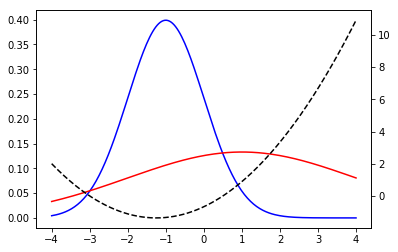

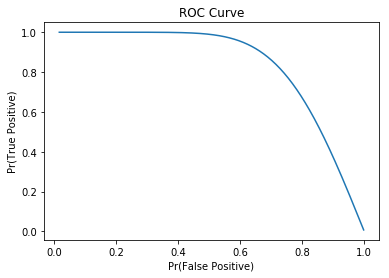

In [8]:
__author__ = 'Justin'

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

def erf(x):
    # save the sign of x
    sign = 1 if x >= 0 else -1
    x = abs(x)

    # constants
    a1 =  0.254829592
    a2 = -0.284496736
    a3 =  1.421413741
    a4 = -1.453152027
    a5 =  1.061405429
    p  =  0.3275911

    # A&S formula 7.1.26
    t = 1.0/(1.0 + p*x)
    y = 1.0 - (((((a5*t + a4)*t) + a3)*t + a2)*t + a1)*t*math.exp(-x*x)
    return math.fabs(sign*y) # erf(-x) = -erf(x)

def gCDF(x,sigma):
    val = erf(x/(sigma*math.sqrt(2)))
    if x >=0:
        return (1+val)/2
    else:
        return (1-val)/2



fig, ax1 = plt.subplots()

# I. Create Gaussian distributions

mu0 = -1
variance0 = 1
sigma0 = math.sqrt(variance0)
x = np.linspace(-4, 4, 200)
ax1.plot(x,mlab.normpdf(x, mu0, sigma0),'b-')

mu1 = 1
variance1 = 9
sigma1 = math.sqrt(variance1)
x = np.linspace(-4, 4, 200)
ax1.plot(x,mlab.normpdf(x, mu1, sigma1),'r-')


# II. Plot distributions and likelihood ratio

ax2 = ax1.twinx()
LikelihoodRatio = np.log(mlab.normpdf(x, mu1, sigma1)) - np.log(mlab.normpdf(x, mu0, sigma0))
ax2.plot(x,LikelihoodRatio,'k--')
plt.show()

# III. Generate ROC points

# Generate level set points
miny = min(LikelihoodRatio)
index = np.where(LikelihoodRatio==miny)
minx = x[index]

delta = 0.01
maxval = 10
lista = np.arange(minx+delta,maxval,delta)
listb = np.arange(minx-delta,-maxval,-delta)

# Calculate ROC points (false and true positive probabilities)
# true positive: distribution 0     false positive: distribution 1
fig2, ax3 = plt.subplots()
false_pos = []
true_pos = []

for a,b in zip(lista,listb):
    prob0 = gCDF(a-mu0,sigma0)-gCDF(b-mu0,sigma0)
    prob1 = 1+gCDF(b-mu1,sigma1)-gCDF(a-mu1,sigma1)

    true_pos.append(prob0)
    false_pos.append(prob1)

ax3.plot(false_pos,true_pos)
ax3.set_title("ROC Curve")
ax3.set_xlabel('Pr(False Positive)')
ax3.set_ylabel('Pr(True Positive)')

plt.show()

